In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from skimage import draw

C:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
def preprocess_image(filename):
    bgr_image       = cv2.imread(filename)
    rgb_image       = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    gray_image      = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    _, binary_image = cv2.threshold(gray_image, 210, 255, cv2.THRESH_BINARY)
    binary_image    = binary_image/255
    
    return binary_image, gray_image

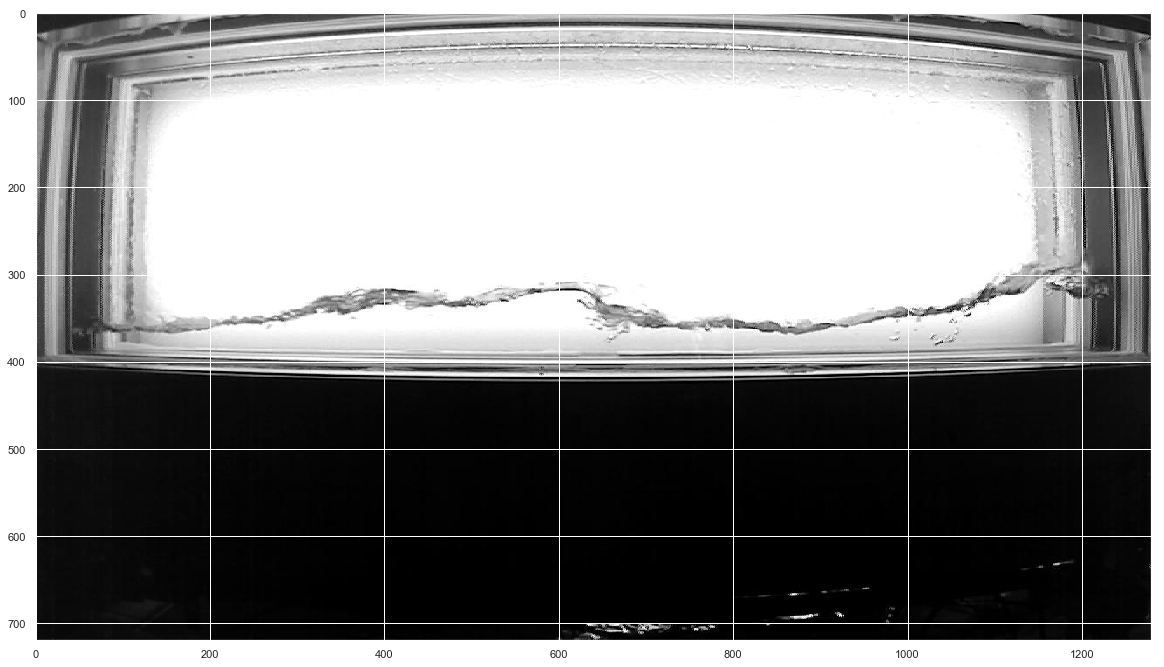

In [3]:
plt.figure(figsize=(20,20))
plt.imshow(preprocess_image('CCFL002_1_2000_500_up_cam1_a_pre.jpg')[1], cmap='gray')
plt.show()

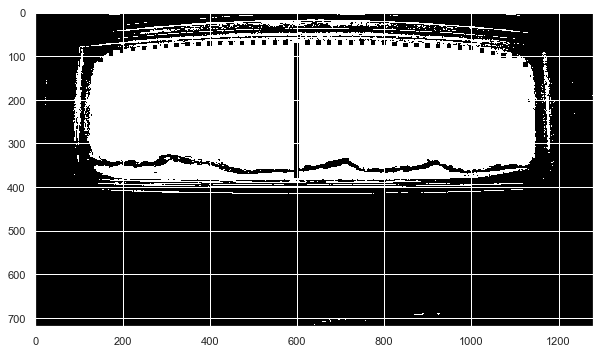

In [6]:
binary_image, gray_image = preprocess_image('CCFL002_1_2000_500_up_cam1_a_post.jpg')
size = 5

plt.figure(figsize=(10,10))
# [y,x]
#binary_image[90-size:90+size,200-size:200+size] = 0   # Point A = 90,200
#binary_image[70-size:70+size,400-size:400+size] = 0   # Point B = 70,400
#binary_image[70-size:70+size,600-size:600+size] = 0   # Point C = 70,600
#binary_image[75-size:75+size,800-size:800+size] = 0   # Point D = 75,800
#binary_image[80-size:80+size,1000-size:1000+size] = 0   # Point E = 80,1000

#binary_image[90:90+251,200-size:200+size] = 0
#binary_image[70:70+272,400-size:400+size] = 0
#binary_image[70:70+286,600-size:600+size] = 0
#binary_image[75:75+285,800-size:800+size] = 0
#binary_image[80:80+283,1000-size:1000+size] = 0

binary_image[110-size:110+size,150-size:150+size] = 0
binary_image[95-size:95+size,175-size:175+size] = 0
binary_image[90-size:90+size,200-size:200+size] = 0
binary_image[85-size:85+size,225-size:225+size] = 0
binary_image[82-size:82+size,250-size:250+size] = 0
binary_image[80-size:80+size,275-size:275+size] = 0
binary_image[78-size:78+size,300-size:300+size] = 0
binary_image[75-size:75+size,325-size:325+size] = 0
binary_image[73-size:73+size,350-size:350+size] = 0
binary_image[73-size:73+size,375-size:375+size] = 0
binary_image[72-size:72+size,400-size:400+size] = 0
binary_image[71-size:71+size,425-size:425+size] = 0
binary_image[71-size:71+size,450-size:450+size] = 0
binary_image[71-size:71+size,475-size:475+size] = 0
binary_image[70-size:70+size,500-size:500+size] = 0
binary_image[70-size:70+size,525-size:525+size] = 0
binary_image[70-size:70+size,550-size:550+size] = 0
binary_image[70-size:70+size,575-size:575+size] = 0
binary_image[70:70+310,600-size:600+size] = 0
binary_image[70-size:70+size,625-size:625+size] = 0
binary_image[70-size:70+size,650-size:650+size] = 0
binary_image[70-size:70+size,675-size:675+size] = 0
binary_image[70-size:70+size,700-size:700+size] = 0
binary_image[70-size:70+size,725-size:725+size] = 0
binary_image[70-size:70+size,750-size:750+size] = 0
binary_image[70-size:70+size,775-size:775+size] = 0
binary_image[70-size:70+size,800-size:800+size] = 0
binary_image[73-size:73+size,825-size:825+size] = 0
binary_image[75-size:75+size,850-size:850+size] = 0
binary_image[76-size:76+size,875-size:875+size] = 0
binary_image[77-size:77+size,900-size:900+size] = 0
binary_image[78-size:78+size,925-size:925+size] = 0
binary_image[78-size:78+size,950-size:950+size] = 0
binary_image[81-size:81+size,975-size:975+size] = 0
binary_image[83-size:83+size,1000-size:1000+size] = 0
binary_image[88-size:88+size,1025-size:1025+size] = 0
binary_image[94-size:94+size,1050-size:1050+size] = 0
binary_image[100-size:100+size,1075-size:1075+size] = 0
binary_image[100-size:100+size,1100-size:1100+size] = 0
binary_image[120-size:120+size,1125-size:1125+size] = 0


plt.imshow(binary_image, cmap='gray')

# Average height: 302

In [53]:
point_A = [90,200]
point_B = [70,400]
point_C = [70,600]
point_D = [75,800]
point_E = [80,1000]

In [54]:
# Start is a coordinate --> [y,x]
def count_pixel(binary_image, start):
    y = start[0]
    x = start[1]
    no_of_pixels = 0
    while binary_image[y,x] == 1:
        y += 1
        no_of_pixels += 1
    
    return no_of_pixels

In [55]:
binary_image = preprocess_image('CCFL002_1_2000_500_up_cam1_a_post.jpg')[0]
count_pixel(binary_image, point_E)

283

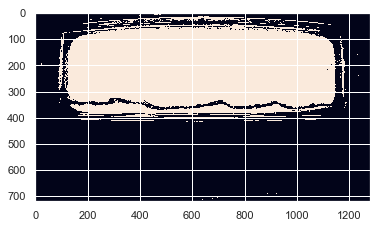

In [56]:
binary_image, gray_image = preprocess_image('CCFL002_1_2000_500_up_cam1_a_post.jpg')
plt.imshow(binary_image)

In [57]:
rr0, cc0, val = draw.line_aa(point_A[0], point_A[1], point_C[0], point_C[1])
rr1, cc1, val = draw.line_aa(point_A[0]+1, point_A[1], point_C[0]+1, point_C[1])
rr2, cc2, val = draw.line_aa(point_A[0]+2, point_A[1], point_C[0]+2, point_C[1])

In [64]:
cc0.shape

(821,)

In [44]:
gray_image[rr0,cc0] = 0
gray_image[rr1,cc1] = 0
gray_image[rr2,cc2] = 0

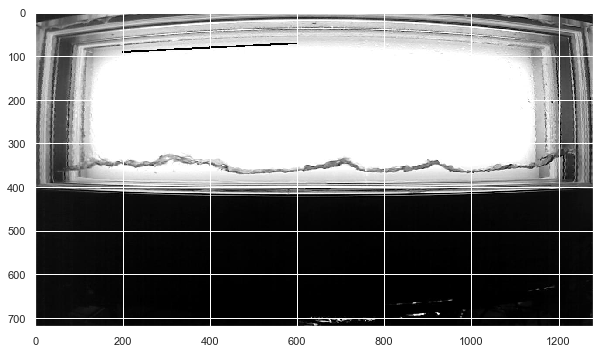

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(gray_image, cmap='gray')

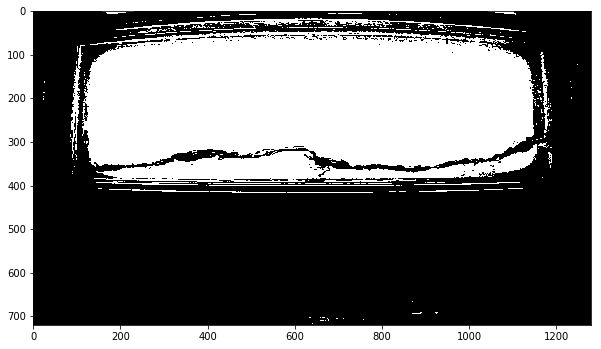

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(preprocess_image('CCFL002_1_2000_500_up_cam1_a_pre.jpg'), cmap='gray')
plt.show()

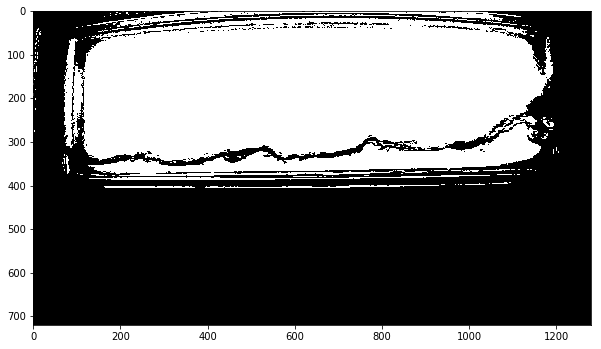

In [103]:
plt.figure(figsize=(10,10))
plt.imshow(preprocess_image('CCFL002_1_2000_500_up_cam2_a_post.jpg'), cmap='gray')
plt.show()

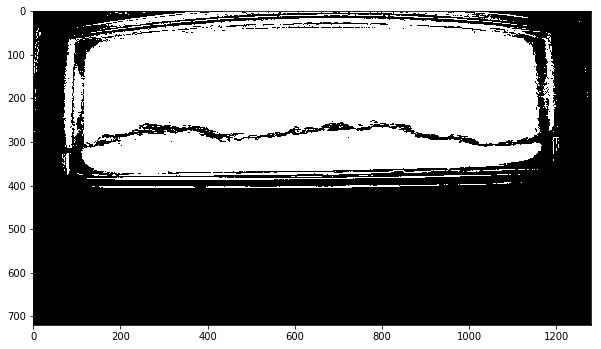

In [104]:
plt.figure(figsize=(10,10))
plt.imshow(preprocess_image('CCFL002_1_2000_500_up_cam2_a_pre.jpg'), cmap='gray')
plt.show()